# Regressão 01 - tarefa 03 - transformações em X e Y

In [15]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [7]:
tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [8]:
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')

In [9]:
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           2.64e-20
Time:                        22:40:41   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

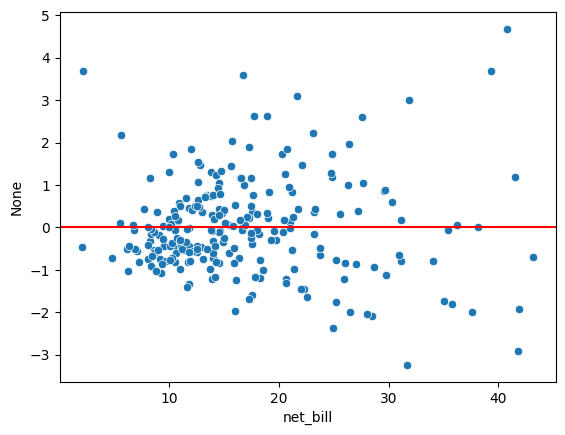

In [10]:
residuals = model.resid
sns.scatterplot(x=tips['net_bill'], y=residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('net_bill')
plt.ylabel

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [11]:
tips['log_tip'] = np.log(tips['tip'])
y_log_tip, X_log_tip = patsy.dmatrices('log_tip ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')

In [12]:
model_log_tip = sm.OLS(y_log_tip, X_log_tip).fit()

print(model_log_tip.summary())

                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.21e-18
Time:                        22:40:41   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.

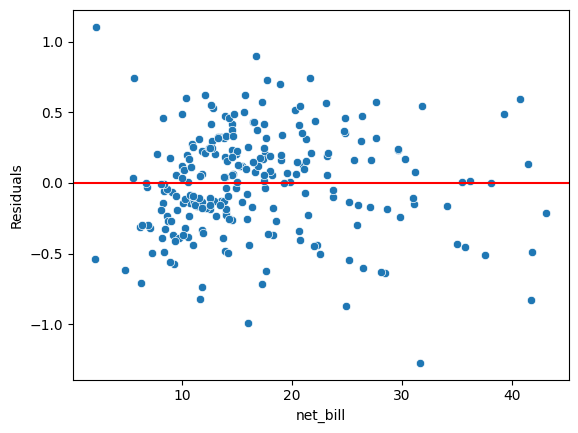

In [13]:
residuals_log_tip = model_log_tip.resid
sns.scatterplot(x=tips['net_bill'], y=residuals_log_tip)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('net_bill')
plt.ylabel('Residuals')
plt.show()

In [18]:
y_pred_tip = np.exp(model_log_tip.predict(X_log_tip))

r_squared_tip = r2_score(tips['tip'], y_pred_tip)
print(f"R² na escala de 'tip': {r_squared_tip}")

R² na escala de 'tip': 0.30680224647369114


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [20]:
renda_raw = pd.read_csv('/Users/macbookpro/Downloads/previsao_de_renda-2.csv')
renda_raw.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [22]:
renda_raw_clean = renda_raw.replace([np.inf, -np.inf], np.nan).dropna()

X_clean = sm.add_constant(renda_raw_clean['tempo_emprego'])
y_clean = renda_raw_clean['renda']

model_simples_clean = sm.OLS(y_clean, X_clean).fit()
print(model_simples_clean.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:48:10   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2177.9041    112.212     19.409

### 2. RESPOSTA:

Modelos Alternativos

In [25]:
model_quantreg = smf.quantreg('renda ~ tempo_emprego', renda_raw).fit(q=0.5)  # q=0.5 representa a mediana
print(model_quantreg.summary())


                         QuantReg Regression Results                          
Dep. Variable:                  renda   Pseudo R-squared:              0.05962
Model:                       QuantReg   Bandwidth:                       690.0
Method:                 Least Squares   Sparsity:                        7158.
Date:                Wed, 13 Dec 2023   No. Observations:                12427
Time:                        22:53:04   Df Residuals:                    12425
                                        Df Model:                            1
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2229.9160     48.943     45.561      0.000    2133.980    2325.852
tempo_emprego   234.5016      4.784     49.020      0.000     225.125     243.879


In [31]:
renda_raw_cleaned = renda_raw.dropna(subset=['tempo_emprego', 'idade', 'qt_pessoas_residencia', 'renda'])
renda_raw_cleaned = renda_raw_cleaned.replace([np.inf, -np.inf], np.nan).dropna()

X_multi = renda_raw_cleaned[['tempo_emprego', 'idade', 'qt_pessoas_residencia']]
y_multi = renda_raw_cleaned['renda']

X_multi = sm.add_constant(X_multi)

model_multi = sm.OLS(y_multi, X_multi).fit()
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     733.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:57:09   Log-Likelihood:            -1.2961e+05
No. Observations:               12427   AIC:                         2.592e+05
Df Residuals:                   12423   BIC:                         2.593e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   537.54

In [32]:
model_multi = sm.OLS(y_multi, X_multi).fit()

print(model_multi.summary())

X_multi_updated = X_multi.drop(columns=['idade'])
model_multi_updated = sm.OLS(y_multi, X_multi_updated).fit()
print(model_multi_updated.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     733.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:58:16   Log-Likelihood:            -1.2961e+05
No. Observations:               12427   AIC:                         2.592e+05
Df Residuals:                   12423   BIC:                         2.593e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   537.54

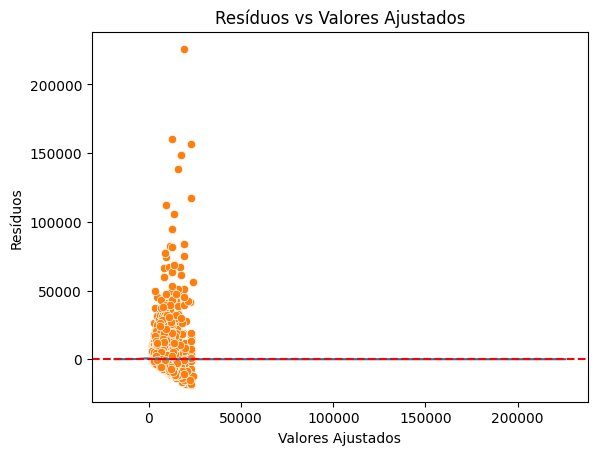

In [34]:
residuos = model_multi_updated.resid

sns.histplot(residuos, kde=True)
plt.title('Distribuição dos Resíduos')

sns.scatterplot(x=model_multi_updated.fittedvalues, y=residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Resíduos vs Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.show()